In [35]:
## Load packages
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Connect to SQLite db
db_connect = sqlite3.connect('switrs.sqlite')

In [7]:
## Explore Collisions Table
sql_query = 'SELECT case_id, collision_date, pedestrian_injured_count, pedestrian_killed_count FROM collisions WHERE pedestrian_injured_count > 0 OR pedestrian_killed_count > 0'
collisions_df = pd.read_sql(sql_query, db_connect)
collisions_df.head()

,case_id,collision_date,pedestrian_injured_count,pedestrian_killed_count
0,3514981,2008-01-04,1,0
1,3514991,2008-01-03,1,0
2,3516596,2008-01-08,1,0
3,3516629,2008-01-05,1,0
4,3516972,2008-01-15,1,0


## On what days are pedestrians involved in collision

In [ ]:
## Pull collisions records which has pedestrians injured and/or killed
sql_query = 'SELECT case_id, collision_date, pedestrian_injured_count, pedestrian_killed_count FROM collisions WHERE pedestrian_injured_count > 0 OR pedestrian_killed_count > 0'
collisions_df = pd.read_sql(sql_query, db_connect)
collisions_df.collision_date = pd.to_datetime(collisions_df.collision_date)
collisions_df.head()

In [16]:
## Find which day of week pedestrians were affected
collisions_df.loc[:,'day_of_week'] = collisions_df.collision_date.dt.dayofweek
collisions_df.day_of_week.value_counts()

4    43206
2    40609
1    40291
3    40117
0    37969
5    33546
6    27216
Name: day_of_week, dtype: int64

In [33]:
## Plot the results in a bar chart (perform some pre-processing steps before that)
day_of_week_map_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
pedestrians_day_df = collisions_df.day_of_week.value_counts().sort_index().reset_index()
pedestrians_day_df.rename(columns={'index':'day', 'day_of_week':'count'}, inplace=True)
pedestrians_day_df.day = pedestrians_day_df.day.map(lambda x: day_of_week_map_dict[x])
pedestrians_day_df

,day,count
0,Monday,37969
1,Tuesday,40291
2,Wednesday,40609
3,Thursday,40117
4,Friday,43206
5,Saturday,33546
6,Sunday,27216


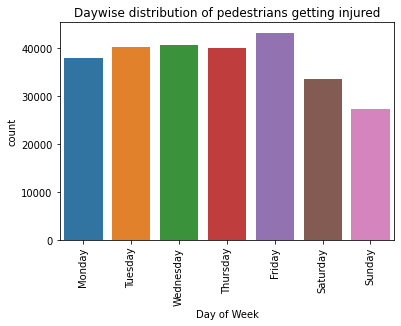

In [39]:
sns.barplot(x='day', y='count', data=pedestrians_day_df)
plt.xticks(rotation=90)
plt.xlabel('Day of Week')
plt.title('Daywise distribution of pedestrians getting injured')
plt.show()